In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\win10\Downloads\DA\salesfolder\sales.csv")

C:\Users\win10\anaconda3\envs\venv\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df['Gender'].value_counts()

M    146184
F    140208
Name: Gender, dtype: int64

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.isna().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['order_date']=pd.to_datetime(df['order_date'])
df['year']=df['order_date'].dt.year


In [8]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [15]:
# total sell in each month
sell_month=df['month'].value_counts()
sell_month

Dec-2020    82528
Apr-2021    42138
Mar-2021    26852
Jun-2021    26804
Nov-2020    17364
Jan-2021    17212
Jul-2021    15340
May-2021    14815
Sep-2021    12483
Aug-2021    11428
Feb-2021    10141
Oct-2020     9287
Name: month, dtype: int64

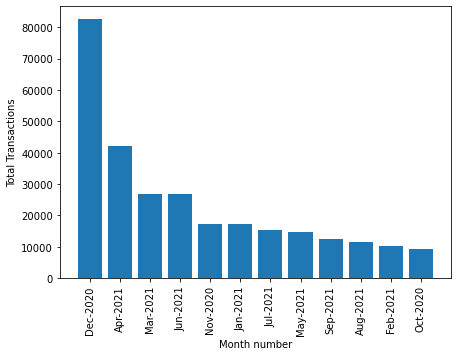

In [16]:
# visualize total sales each month
plt.figure(figsize=(7,5))
plt.bar(sell_month.index,sell_month)
plt.xticks(df['month'].value_counts().index,rotation='vertical')
plt.ylabel('Total Transactions')
plt.xlabel('Month number')
plt.show()

C:\Users\win10\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\win10\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Title')

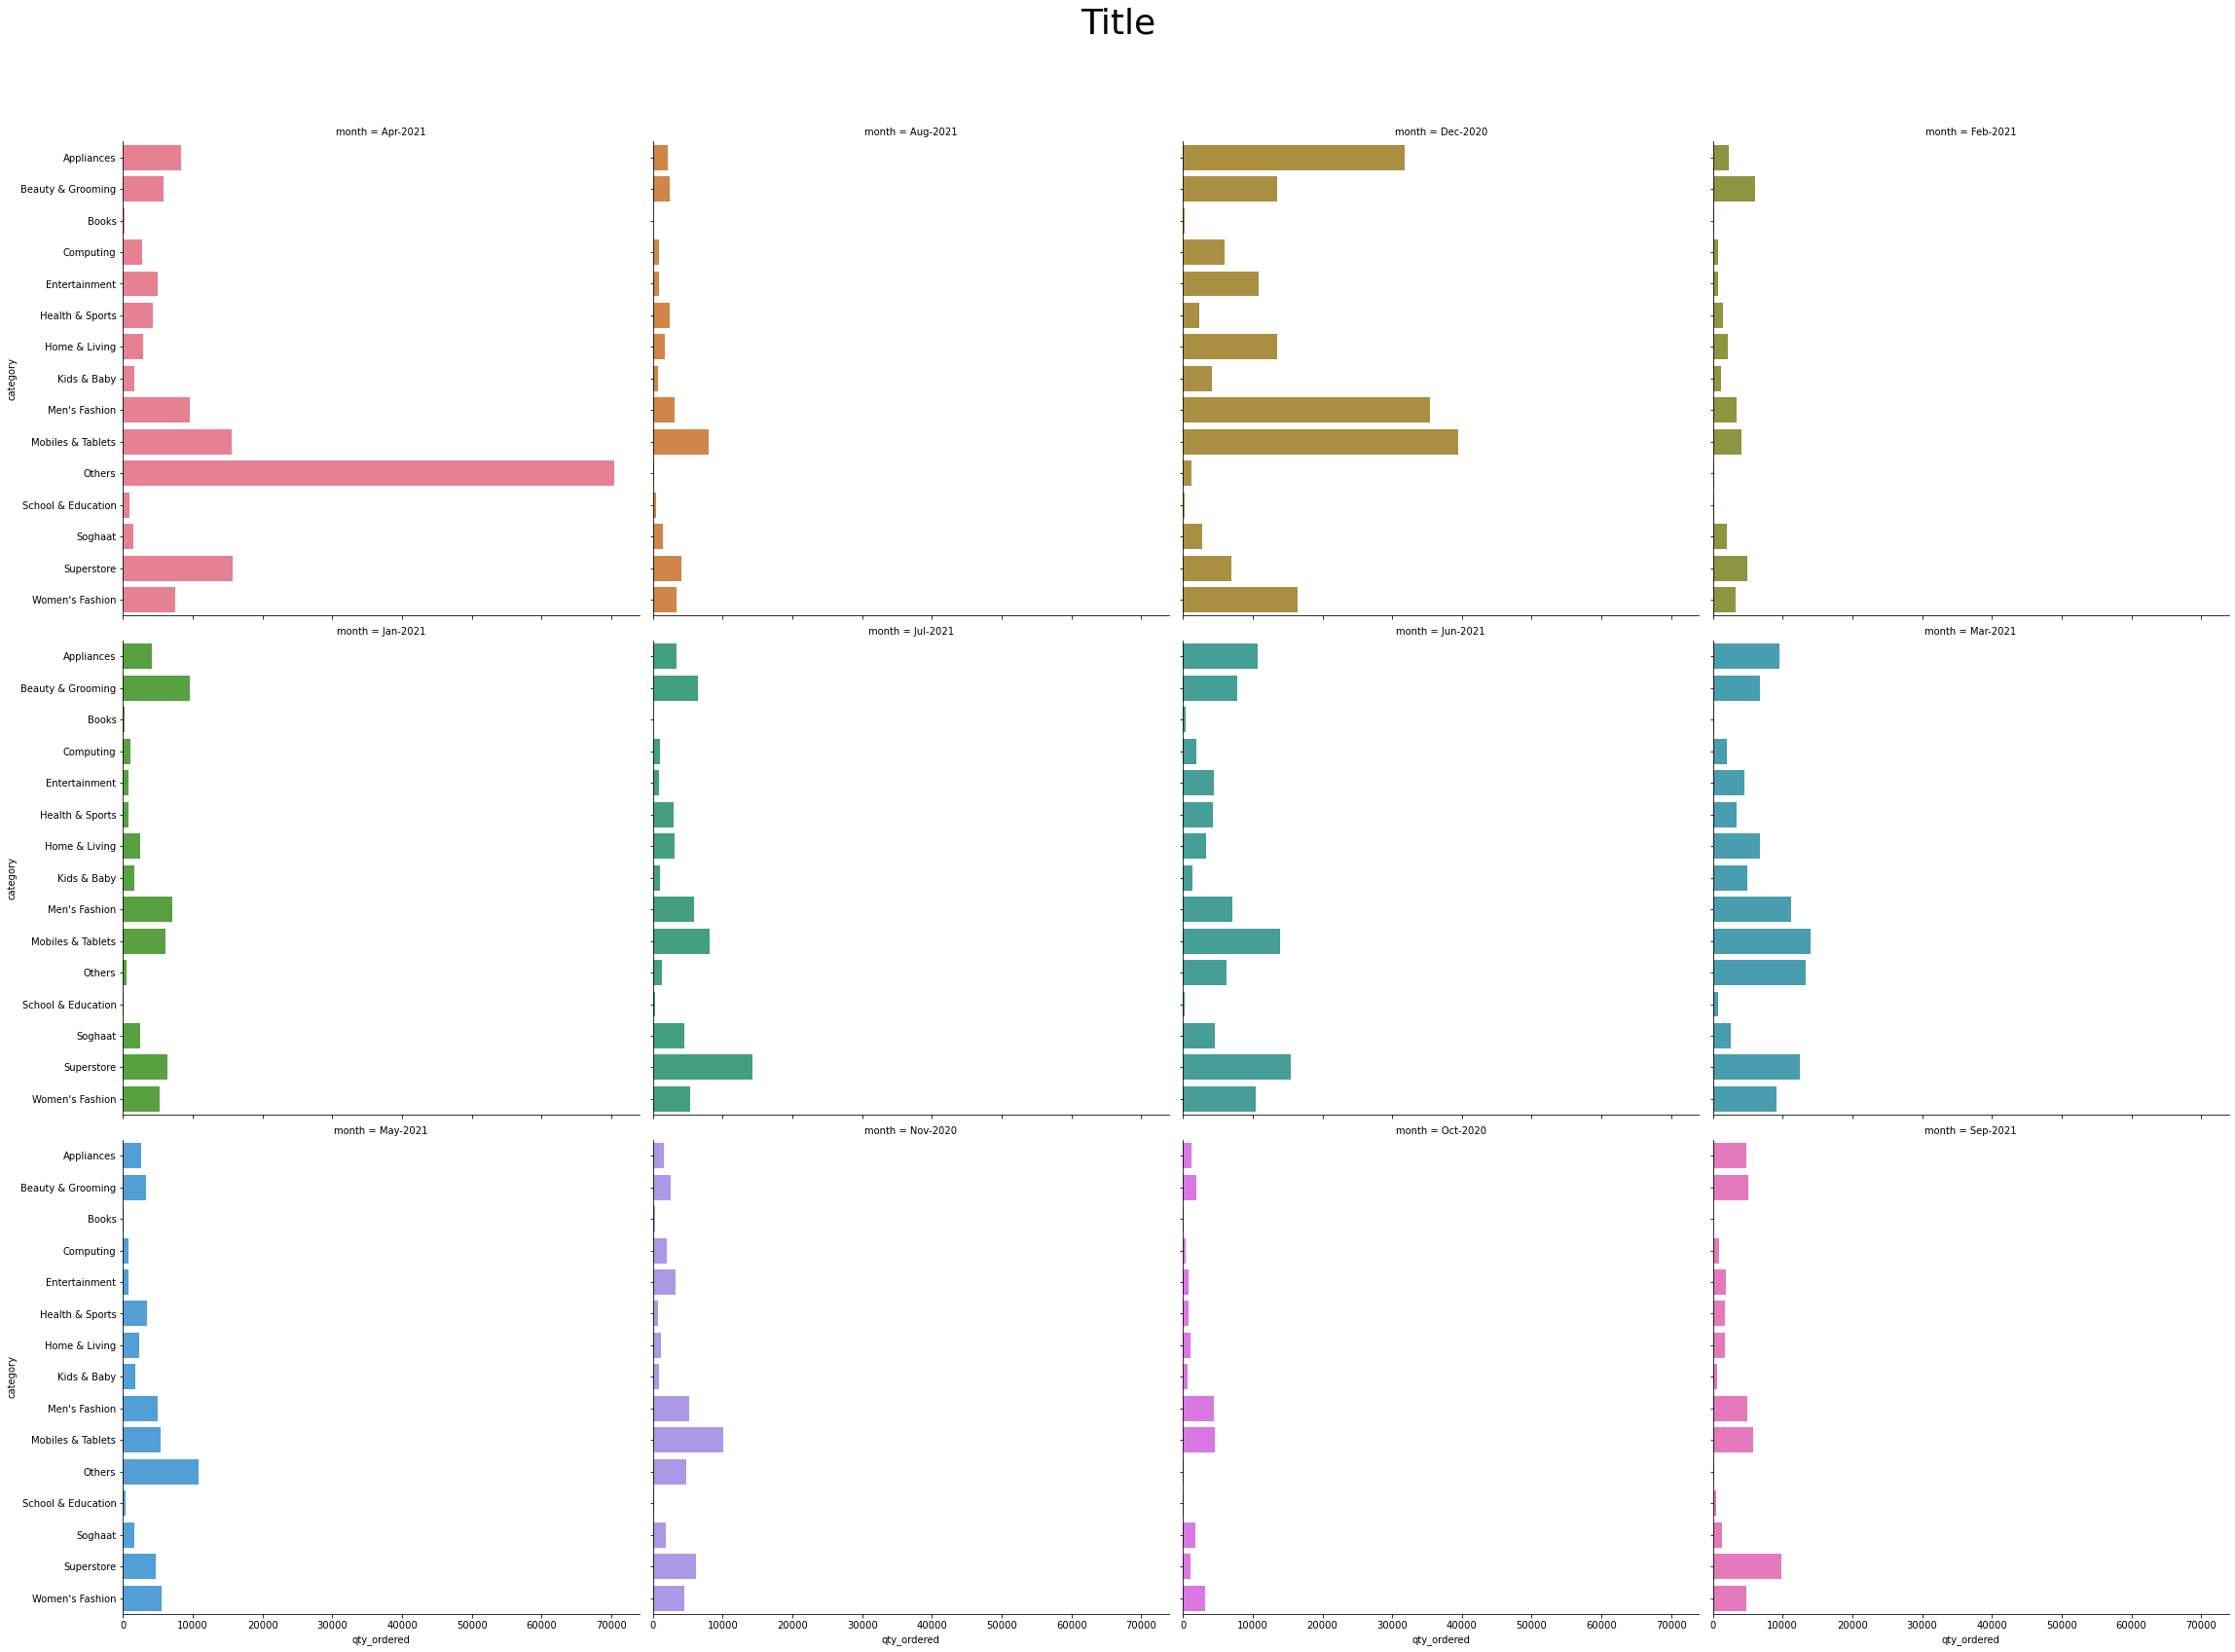

In [36]:
# distribution total each category sale per month
temp_data = df.groupby(['month', 'category']).sum().reset_index()

g = sns.FacetGrid(temp_data, col="month", hue='month', col_wrap=4, size=8)
g.map(sns.barplot, "qty_ordered", "category")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Title', fontsize=36)

In [19]:
# how much order by category
sell_cat=df['category'].value_counts()
sell_cat

Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: category, dtype: int64

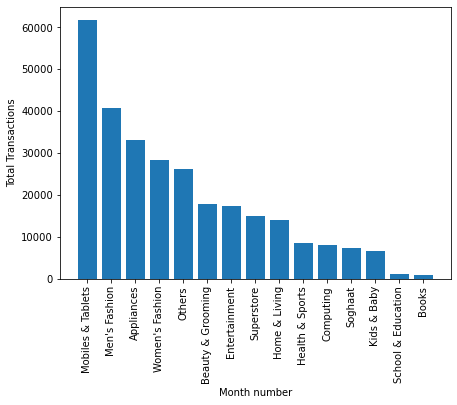

In [43]:
# visualize total sales each category
plt.figure(figsize=(7,5))
plt.bar(sell_cat.index,sell_cat)
plt.xticks(df['category'].value_counts().index,rotation='vertical')
plt.ylabel('Total Transactions')
plt.xlabel('Month number')
plt.show()

In [15]:
# find total mobiles and tablets category per city
grp_city=df.groupby(['City'])
top_mb=grp_city['category'].apply(lambda x: x.str.contains('Mobiles & Tablets',"Men's Fashion").sum()).sort_values(ascending=False)
top_mb.head(10)

City
West Rutland     398
Washington       396
Atlanta          325
Kittanning       283
Springfield      272
Houston          241
Baltimore        240
New York City    231
El Paso          205
Goodland         202
Name: category, dtype: int64

In [55]:
# top 10 total sell based on city
sell_city=df['City'].value_counts()
sell_city

Dekalb                2525
Washington            2008
New York City         1391
Houston               1250
El Paso               1019
                      ... 
Pearl                    1
Mill Hall                1
Chesaning                1
Riggins                  1
Lewiston Woodville       1
Name: City, Length: 15892, dtype: int64

In [ ]:
# visualize top 10 total sell based on city
plt.figure(figsize=(7,5))
plt.plot(sell_city.index,sell_city)
plt.xticks(sell_city.index,rotation='vertical')
plt.ylabel('Total Transactions')
plt.xlabel('Month number')
plt.show()

In [55]:

df.groupby(['City'])['category'].value_counts().loc[['Dekalb','Washington','New York City', 'Houston','El Paso', 'Atlanta','Dallas','Springfield','Albany','Kittanning']]

City        category         
Dekalb      Health & Sports      2524
            Women's Fashion         1
Washington  Mobiles & Tablets     396
            Men's Fashion         261
            Appliances            244
                                 ... 
Kittanning  Soghaat                13
            Others                  8
            Entertainment           2
            Appliances              1
            Kids & Baby             1
Name: category, Length: 128, dtype: int64

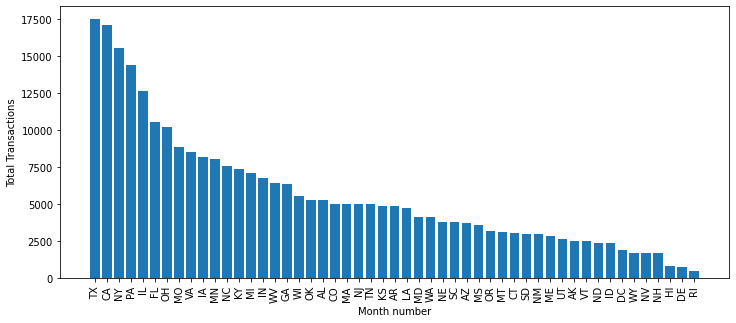

In [33]:
# visualize total sales each state
plt.figure(figsize=(12,5))
plt.bar(df['State'].value_counts().index,df['State'].value_counts())
plt.xticks(df['State'].value_counts().index,rotation='vertical')
plt.ylabel('Total Transactions')
plt.xlabel('Month number')
plt.show()

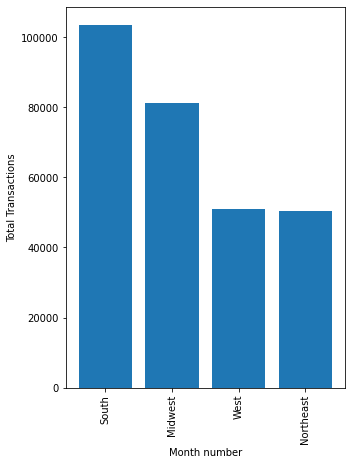

In [39]:
# visualize total sales each state
plt.figure(figsize=(5,7))
plt.bar(df['Region'].value_counts().index,df['Region'].value_counts())
plt.xticks(df['Region'].value_counts().index,rotation='vertical')
plt.ylabel('Total Transactions')
plt.xlabel('Month number')
plt.show()

C:\Users\win10\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\win10\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Title')

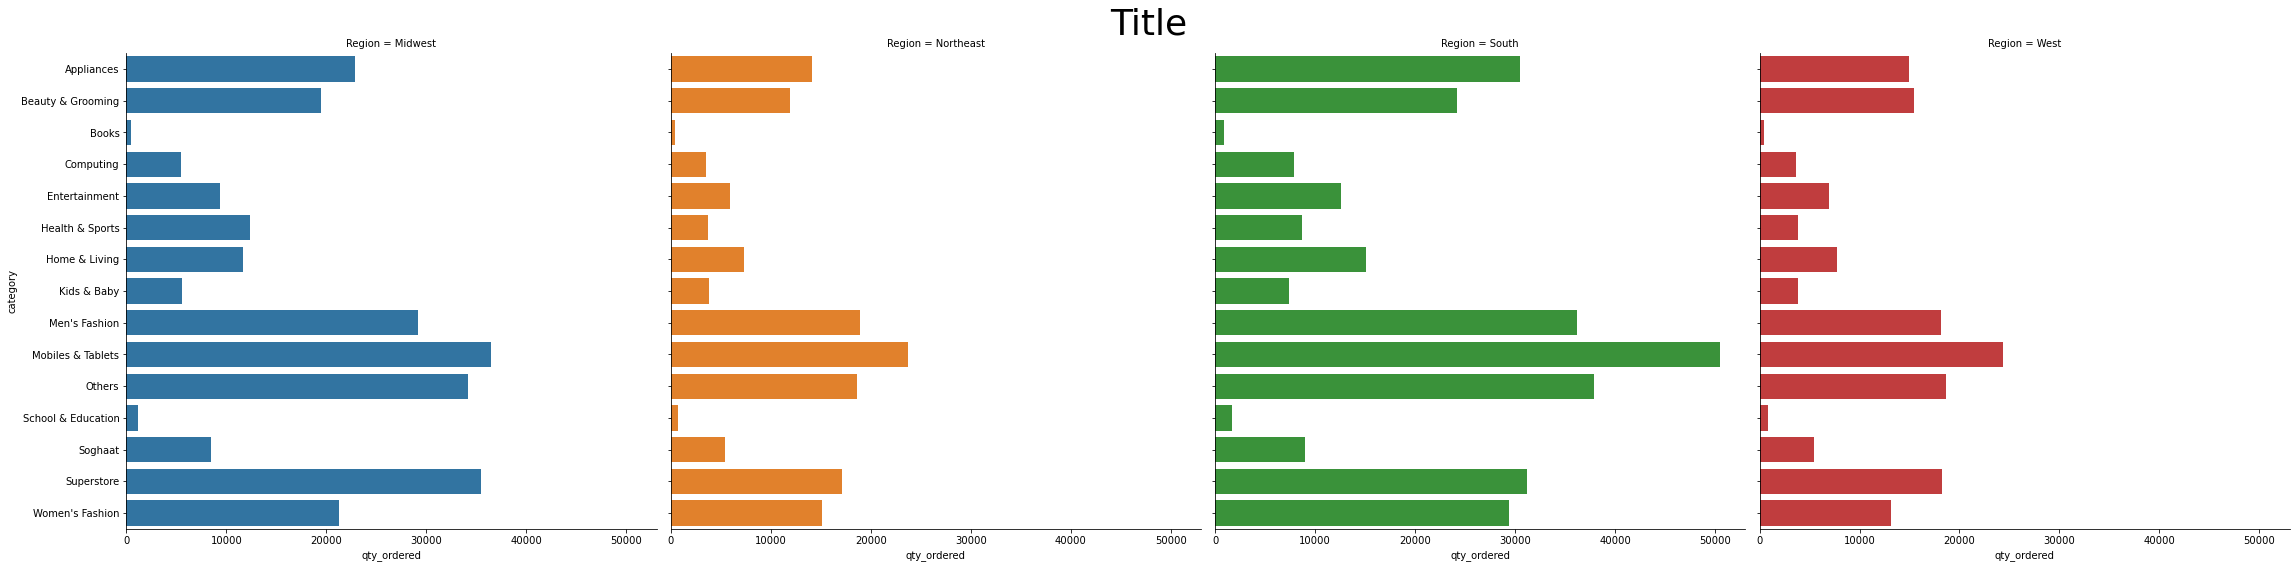

In [54]:
temp_data = df.groupby(['Region', 'category']).sum().reset_index()
#
g = sns.FacetGrid(temp_data, col="Region", hue='Region', col_wrap=4, size=8)
g.map(sns.barplot, "qty_ordered", "category")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Title', fontsize=36)